<a href="https://colab.research.google.com/github/chasubeen/python_selfstudy/blob/master/%E1%84%92%E1%85%A9%E1%86%AB%E1%84%8C%E1%85%A1%20%E1%84%80%E1%85%A9%E1%86%BC%E1%84%87%E1%85%AE%E1%84%92%E1%85%A1%E1%84%82%E1%85%B3%E1%86%AB%20%E1%84%86%E1%85%A5%E1%84%89%E1%85%B5%E1%86%AB%E1%84%85%E1%85%A5%E1%84%82%E1%85%B5%E1%86%BC%2B%E1%84%83%E1%85%B5%E1%86%B8%E1%84%85%E1%85%A5%E1%84%82%E1%85%B5%E1%86%BC%20%E1%84%89%E1%85%B5%E1%86%AF%E1%84%89%E1%85%B3%E1%86%B8/6-3.%20%EC%A3%BC%EC%84%B1%EB%B6%84%20%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**차원과 차원 축소**

###**주성분 분석 소개**

###**PCA 클래스**

In [4]:
# 과일 사진 준비하기
!wget https://bit.ly/fruits_300_data -O fruits_300.npy
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1,100 * 100)

--2022-07-13 01:35:45--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-07-13 01:35:45--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-07-13 01:35:45--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [5]:
# PCA 클래스 객체 생성하기
from sklearn.decomposition import PCA
pca = PCA(n_components = 50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [6]:
# 주성분 개수 파악하기
print(pca.components_.shape)

(50, 10000)


In [8]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # 샘플의 개수
    # 한 줄에 10개씩 이미지 그리기
    rows = int(np.ceil(n/10))
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, 
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그리기
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

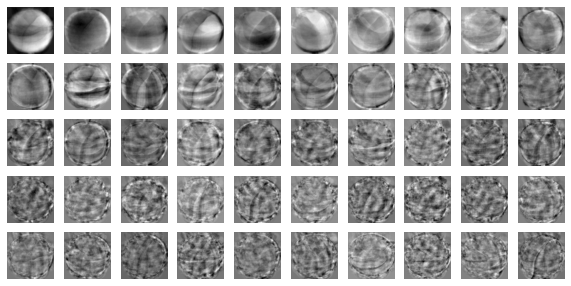

In [9]:
# 주성분을 그림으로 그리기
draw_fruits(pca.components_.reshape(-1,100,100))

In [10]:
# 원본 데이터의 차원 축소하기
print(fruits_2d.shape)

(300, 10000)


In [12]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


###**원본 데이터 재구성**

In [13]:
# 차원 축소한 데이터 복원하기
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


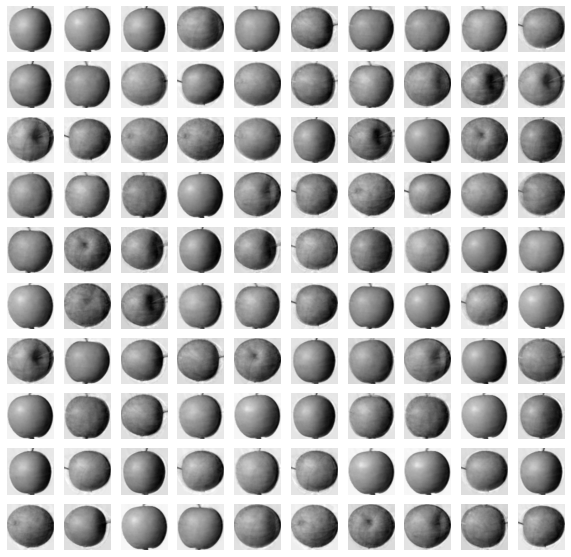

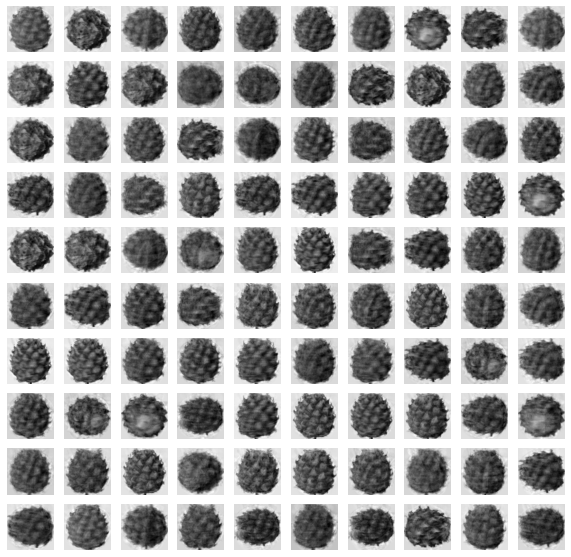

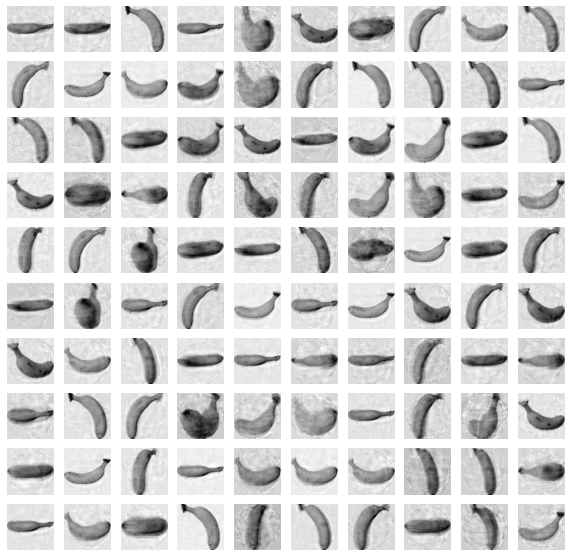

In [15]:
# 100개씩 나누어 출력하기
fruits_reconstruct = fruits_inverse.reshape(-1,100,100)
for start in [0,100,200]:
  draw_fruits(fruits_reconstruct[start:start + 100])
  print("\n")

###**설명된 분산**

In [16]:
print(np.sum(pca.explained_variance_ratio_))

0.9215428320238176


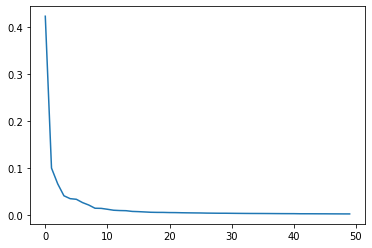

In [17]:
# 설명된 분산의 비율을 그래프로 파악하기
plt.plot(pca.explained_variance_ratio_)
plt.show()

###**다른 알고리즘과 함께 사용하기**

In [18]:
# 로지스틱 회귀 모댈(분류 모델)을 활용
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [19]:
target = np.array([0] * 100 + [1] * 100 + [2] * 100)

In [21]:
# 교차 검증 수행하기
from sklearn.model_selection import cross_validate
scores = cross_validate(lr,fruits_2d,target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.6655640602111816


In [22]:
scores = cross_validate(lr,fruits_pca,target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.05215044021606445


In [23]:
# 특정 비율만큼 설명된 분산 찾기
pca = PCA(n_components = 0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [24]:
print(pca.n_components_)

2


In [25]:
# 해당 모델로 원본 데이터 변환하기
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [27]:
# 교차 검증 결과 확인하기
scores = cross_validate(lr,fruits_pca,target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.044745349884033205


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [28]:
# 차원 축소된 데이터를 사용하여 k-평균 알고리즘으로 클러스터 찾기
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3,random_state = 42)
km.fit(fruits_pca)
print(np.unique(km.labels_,return_counts = True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


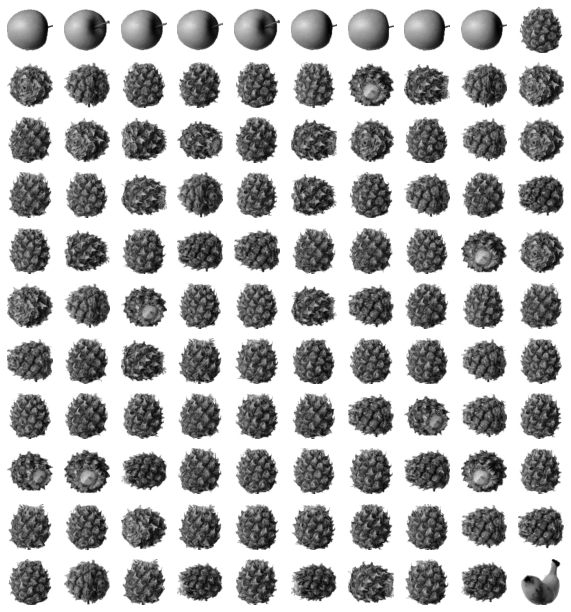

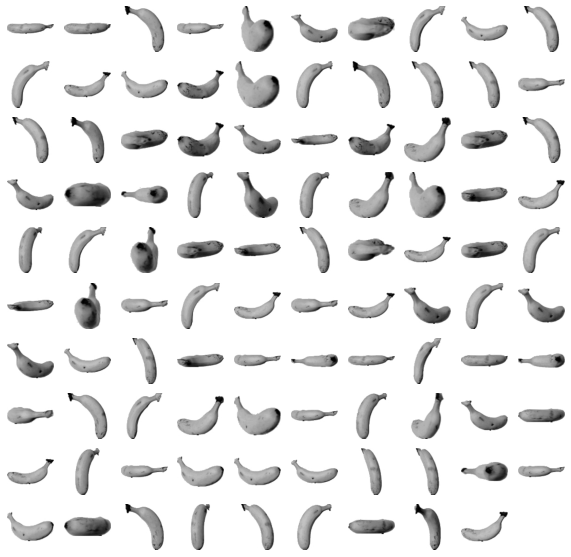

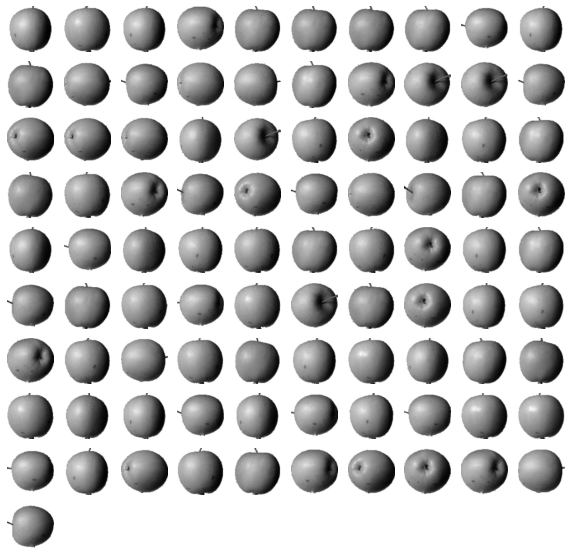

In [29]:
# KMeans가 찾은 레이블을 사용해 과일 이미지 출력하기
for label in range(0,3):
  draw_fruits(fruits[km.labels_ == label])
  print("\n")

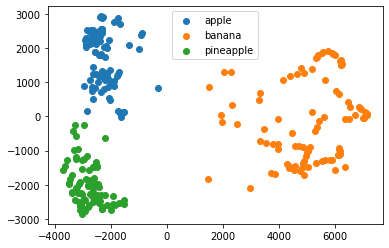

In [30]:
# 클러스터별로 나누어 산점도 그려보기
for label in range(0,3):
  data = fruits_pca[km.labels_ == label]
  plt.scatter(data[:,0],data[:,1])
plt.legend(['apple','banana','pineapple'])
plt.show()